# Part 1: Data Exploration

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Get the current working directory
path = os.getcwd()

# Paths to my files
users_file = path + "/Desktop/USER_TAKEHOME.csv"
products_file = path + "/Desktop/PRODUCTS_TAKEHOME.csv"
transactions_file = path + "/Desktop/TRANSACTION_TAKEHOME.csv"

In [12]:
# Load the data using pandas

users = pd.read_csv(users_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

In [36]:
# Check the first few rows for each dataset.

print("Users Table Head:")
print(users.head())

print("\nProducts Table Head:")
print(products.head())

print("\nTransactions Table Head:")
print(transactions.head())

Users Table Head:
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  

Products Table Head:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair

In [16]:
# Check data types
print("Users Data Types:\n", users.dtypes)
print("Products Data Types:\n", products.dtypes)
print("Transactions Data Types:\n", transactions.dtypes)

Users Data Types:
 ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object
Products Data Types:
 CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object
Transactions Data Types:
 RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


In [23]:
# Check for missing values

missing_users = users.isnull().sum()
missing_products = products.isnull().sum()
missing_transactions = transactions.isnull().sum()

print("Missing Values in Users:\n", missing_users)
print("Missing Values in Products:\n", missing_products)
print("Missing Values in Transactions:\n", missing_transactions)

Missing Values in Users:
 ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
Missing Values in Products:
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64
Missing Values in Transactions:
 RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [25]:
# Check for duplicates

duplicates_users = users.duplicated().sum()
duplicates_products = products.duplicated().sum()
duplicates_transactions = transactions.duplicated().sum()

print("Duplicate Rows in Users:\n", duplicates_users)
print("Duplicate Rows in Products:\n", duplicates_products)
print("Duplicate Rows in Transactions:\n", duplicates_transactions)

Duplicate Rows in Users:
 0
Duplicate Rows in Products:
 215
Duplicate Rows in Transactions:
 171


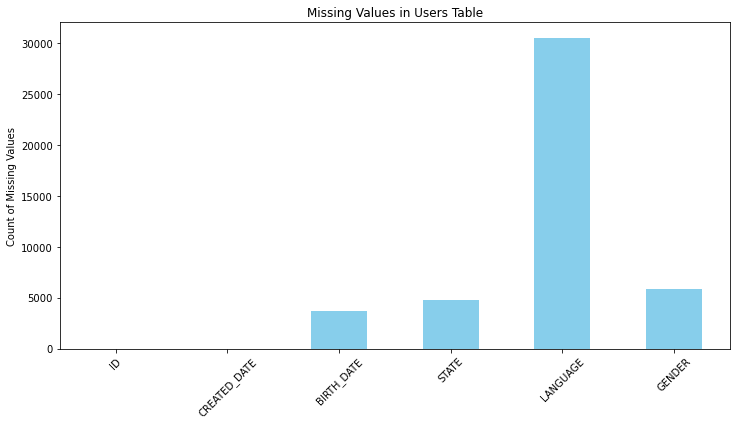

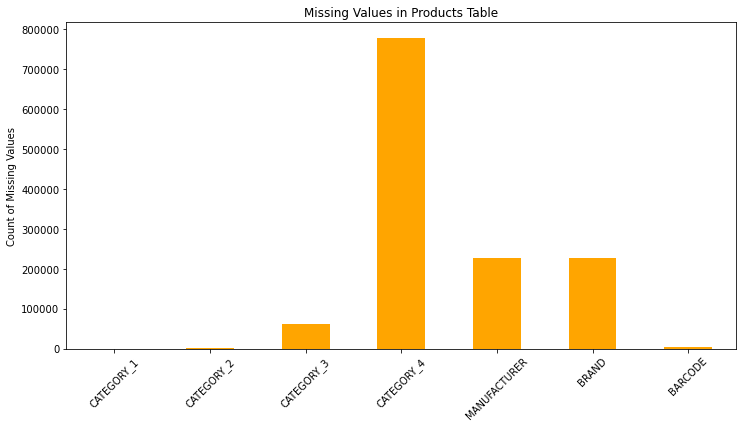

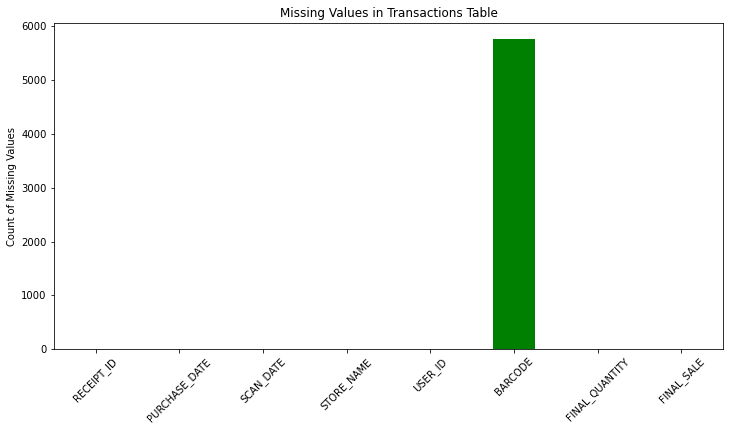

In [24]:
# Plot missing values for each table

plt.figure(figsize=(12, 6))
missing_users.plot(kind='bar', color='skyblue')
plt.title("Missing Values in Users Table")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
missing_products.plot(kind='bar', color='orange')
plt.title("Missing Values in Products Table")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
missing_transactions.plot(kind='bar', color='green')
plt.title("Missing Values in Transactions Table")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

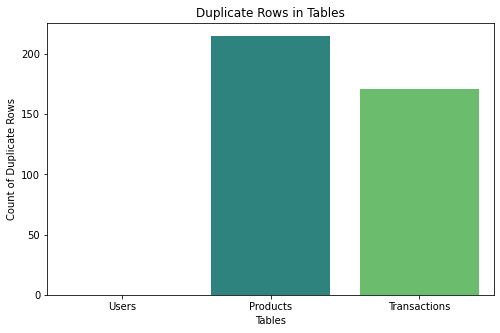

In [28]:
# Bar plot for duplicate rows

plt.figure(figsize=(8, 5))
sns.barplot(x=["Users", "Products", "Transactions"],
            y=[duplicates_users, duplicates_products, duplicates_transactions],
            palette="viridis")
plt.title("Duplicate Rows in Tables")
plt.ylabel("Count of Duplicate Rows")
plt.xlabel("Tables")
plt.show()

Number of Outliers in FINAL_SALE: 2984


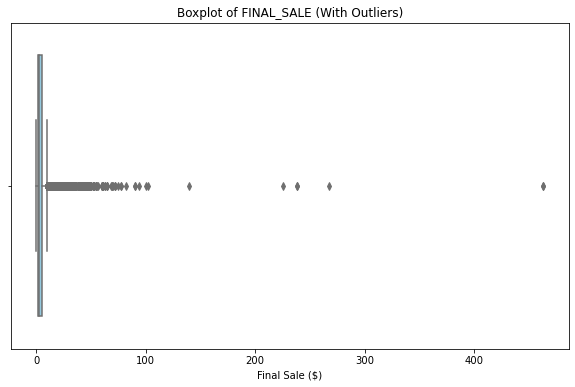

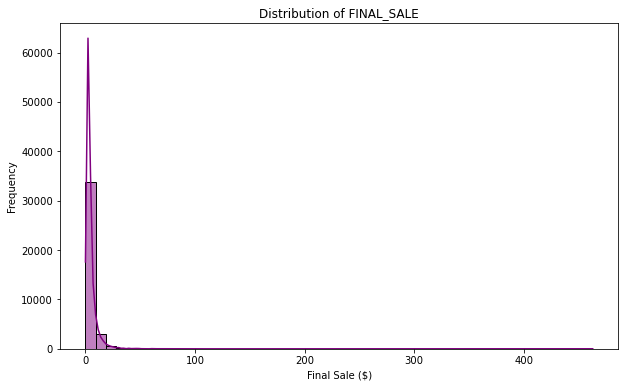

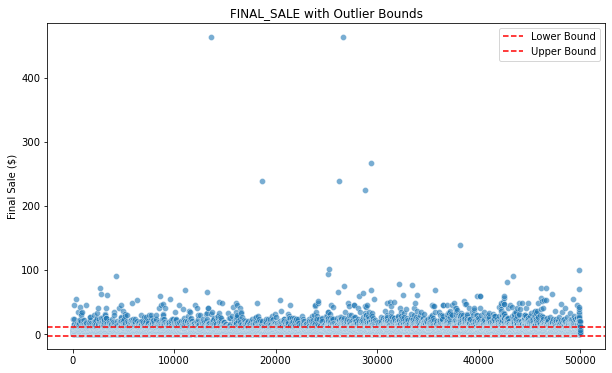

In [35]:
# Find the Outlier fo the transaction dataset

# Convert FINAL_SALE to numeric
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')

# Identify potential outliers using the IQR method
Q1 = transactions['FINAL_SALE'].quantile(0.25)  # First quartile (25th percentile)
Q3 = transactions['FINAL_SALE'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = transactions[(transactions['FINAL_SALE'] < lower_bound) | (transactions['FINAL_SALE'] > upper_bound)]
print(f"Number of Outliers in FINAL_SALE: {len(outliers)}")

# Visualization of FINAL_SALE with Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=transactions['FINAL_SALE'], color='skyblue')
plt.title("Boxplot of FINAL_SALE (With Outliers)")
plt.xlabel("Final Sale ($)")
plt.show()

# Histogram of FINAL_SALE to observe distribution (Right Skewed)
plt.figure(figsize=(10, 6))
sns.histplot(transactions['FINAL_SALE'], bins=50, kde=True, color='purple')
plt.title("Distribution of FINAL_SALE")
plt.xlabel("Final Sale ($)")
plt.ylabel("Frequency")
plt.show()

# Scatterplot to highlight outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x=range(len(transactions)), y='FINAL_SALE', alpha=0.6)
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title("FINAL_SALE with Outlier Bounds")
plt.ylabel("Final Sale ($)")
plt.legend()
plt.show()


## Exercise Answers:

### 1. Are there any data quality issues present?

Yes, I think there are several data quality issues.

**1. Missing Data**
* User Table: 
        
     i. `LANGUAGE` column has 30508 missing values, so if we want to do segmentation by language, it will be a potential issue.
        
     ii. `GENDER` and `STATE` columns also have significant gaps (5,892 and 4,812 missing values), making it challenging to analyze user preference.


* Products Table:
    
     i. `CATEGORY_4` column is almost entirely missing, it has 778,093 missing values,  which means category 4 doesn’t exist for the majority of products if it's a subcategory. We could eliminate this column for simplicity in the future. 
      
* Transactions Table:

     i. `BARCODE` column has 5762 missing values, and that could cause difficulties in  linking transactions to product.
        

**2. Duplicate Rows:**

* Products Table: Contains 215 duplicate rows, leading to redundancy and potential inaccuracies in analysis.

* Transactions Table: Contains 171 duplicate rows, this could misrepresent transactional data.

**3. Outliers:**

The `FINAL_SALE` column in the Transactions table has 2984 outliers, using IQR. From the  histogram of `FINAL_SALE`, we can see the distribution and it's right skewed, which could skew aggregate metrics like total sales or average transaction value.

### 2. Are there any fields that are challenging to understand?

Yes, I think there are some fields that is lack of clear definations:

1. Products Table:

`CATEGORY_1`, `CATEGORY_2`, `CATEGORY_3`, and `CATEGORY_4`: These fields are not well-defined. It's unclear whether they represent a hierarchy (e.g., main category to subcategory) or independent attributes.

2. Transactions Table:

Data type for column `FINAL_QUANTITY` is object instead of a numeric type, because it stored "0" as "zero," which could imply formatting inconsistencies. I suggest we could change it to numeric.

3. Users Table:

`LANGUAGE` column is helpful for us to do users segmentaion, but there are so many missing values make it harder to interpret user preferences accurately.

# Part 2: SQL Queries

In [45]:
import sqlite3
from IPython.display import display

In [48]:
# Create an SQLite database and load data into it
conn = sqlite3.connect("fetch_data.db")
users.to_sql("users", conn, if_exists="replace", index=False)
products.to_sql("products", conn, if_exists="replace", index=False)
transactions.to_sql("transactions", conn, if_exists="replace", index=False)

    # Question 2: Top 5 brands by sales among users with accounts for at least six months
    # Join users table and product table 
query2 = """
        SELECT p.BRAND, SUM(t.FINAL_SALE) AS TotalSales
        FROM transactions t
        JOIN users u ON t.USER_ID = u.ID
        JOIN products p ON t.BARCODE = p.BARCODE
        WHERE DATE('now') >= DATE(u.CREATED_DATE, '+6 months')
        GROUP BY p.BRAND
        ORDER BY TotalSales DESC
        LIMIT 5;
    """
result2 = pd.read_sql_query(query2, conn)
print("Top 5 brands by sales among users with accounts for at least six months:")
display(result2)

    # Question 3: Percentage of sales in Health & Wellness category by generation
    # Using CASE WHEN to segment users by generation, get the percentage of sales in Health & Wellness category, group by generation.
    
query3 = """
        SELECT 
            CASE 
                WHEN (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) BETWEEN 18 AND 24 THEN 'Gen Z'
                WHEN (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) BETWEEN 25 AND 40 THEN 'Millennials'
                WHEN (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) BETWEEN 41 AND 56 THEN 'Gen X'
                ELSE 'Boomers'
            END AS Generation,
            SUM(t.FINAL_SALE) * 100.0 / (SELECT SUM(FINAL_SALE) FROM transactions) AS PercentageOfSales
        FROM transactions t
        JOIN users u ON t.USER_ID = u.ID
        JOIN products p ON t.BARCODE = p.BARCODE
        WHERE p.CATEGORY_1 = 'Health & Wellness'
        GROUP BY Generation;
    """
result3 = pd.read_sql_query(query3, conn)
print("Percentage of sales in Health & Wellness category by generation:")
display(result3)

    # Open-ended Question 1: Who are Fetch’s power users? 
    # assumption: users with the most receipts scanned
    
query4 = """
        SELECT u.ID AS UserID, COUNT(t.RECEIPT_ID) AS ReceiptCount
        FROM transactions t
        JOIN users u ON t.USER_ID = u.ID
        GROUP BY u.ID
        ORDER BY ReceiptCount DESC
        LIMIT 10;
    """
result4 = pd.read_sql_query(query4, conn)
print("Fetch's power users:")
display(result4)

    # Open-ended Question 2: Leading brand in Dips & Salsa category
    # Assumption: leading brand is the brand with highest total sales
    
query5 = """
        SELECT p.BRAND, SUM(t.FINAL_SALE) AS TotalSales
        FROM transactions t
        JOIN products p ON t.BARCODE = p.BARCODE
        WHERE p.CATEGORY_2 = 'Dips & Salsa'
        GROUP BY p.BRAND
        ORDER BY TotalSales DESC
        LIMIT 1;
    """
result5 = pd.read_sql_query(query5, conn)
print("Leading brand in Dips & Salsa category:")
display(result5)


# Close the database connection

conn.close()

Top 5 brands by sales among users with accounts for at least six months:


,BRAND,TotalSales
0,CVS,72.00
1,TRIDENT,46.72
2,DOVE,42.88
3,COORS LIGHT,34.96
4,None,16.65


Percentage of sales in Health & Wellness category by generation:


,Generation,PercentageOfSales
0,Boomers,0.055269
1,Gen X,0.034164
2,Millennials,0.021082


Fetch's power users:


,UserID,ReceiptCount
0,6528a0a388a3a884364d94dc,6
1,646bdaa67a342372c857b958,6
2,62ffec490d9dbaff18c0a999,6
3,62c09104baa38d1a1f6c260e,6
4,61a58ac49c135b462ccddd1c,6
5,610a8541ca1fab5b417b5d33,6
6,5f6518d1bf3f5a43fdd0c9a5,6
7,5f64fff6dc25c93de0383513,6
8,5c366bf06d9819129dfa1118,6
9,6682b24786cc41b000ce5e77,4


Leading brand in Dips & Salsa category:


,BRAND,TotalSales
0,TOSTITOS,260.99


# Part 3: Communicate with stakeholders

**Subject: Key Findings and Next Steps from Data Investigation**

Hi,

I wanted to share the results of my recent analysis of our dataset and highlight a few key findings and outstanding questions.

**Key Data Quality Issues**

1. Missing Data:

    * The `CATEGORY_4` column in the Products table is almost entirely missing, making it difficult for analysis or segmentation.
    * The `BARCODE` column has missing values in both Products and Transactions, which impacts our ability to link transactions to specific products effectively.
    * Columns in Users table, such as `LANGUAGE` and `GENDER`, also have significant gaps.


2. Duplicate Records:

    The Products and Transactions tables contain duplicate entries, which may lead to inflated metrics, so we need to take care of it in future analysis, I suggest we could remove or adjust them.
    
**Interesting Trend in the Data**

Boomers (ages 57+) contribute the highest percentage of sales in the `Health & Wellness` category, accounting for 5.5% of total sales. This suggests that targeted marketing efforts for this category may be particularly effective for the Boomer demographic.

**Request for Action**

1. Resolve duplicates and missing data, ensure consistent data formatting with technical support.

2. Confirm the most valuable metrics (e.g., receipts scanned, total sales) to prioritize cleaning and analyzing data accordingly.

3. Decide which demographics or categories should be prioritized for further investigation and marketing focus.